<a href="https://www.kaggle.com/code/phaneendra1235/anime-dataset?scriptVersionId=180422288" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-dataset/anime_data.csv


In [26]:
df = pd.read_csv("/kaggle/input/anime-dataset/anime_data.csv")
df.head()

,id,title,genres,episodes,status,ranking
0,NaN,Sousou no Frieren,"Adventure, Drama, Fantasy",0,Not yet aired,1
1,NaN,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",64,Finished Airing,2
2,NaN,Steins;Gate,"Drama, Sci-Fi, Suspense",24,Finished Airing,3
3,NaN,Gintama°,"Action, Comedy, Sci-Fi",51,Finished Airing,4
4,NaN,Shingeki no Kyojin Season 3 Part 2,"Action, Drama",10,Finished Airing,5


In [27]:
df = df.drop('id', axis=1)
df.head()

,title,genres,episodes,status,ranking
0,Sousou no Frieren,"Adventure, Drama, Fantasy",0,Not yet aired,1
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",64,Finished Airing,2
2,Steins;Gate,"Drama, Sci-Fi, Suspense",24,Finished Airing,3
3,Gintama°,"Action, Comedy, Sci-Fi",51,Finished Airing,4
4,Shingeki no Kyojin Season 3 Part 2,"Action, Drama",10,Finished Airing,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11480 entries, 0 to 11479
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     11480 non-null  object
 1   genres    11480 non-null  object
 2   episodes  11480 non-null  int64 
 3   status    11480 non-null  object
 4   ranking   11480 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 448.6+ KB


In [29]:
df.isnull().sum()

title       0
genres      0
episodes    0
status      0
ranking     0
dtype: int64

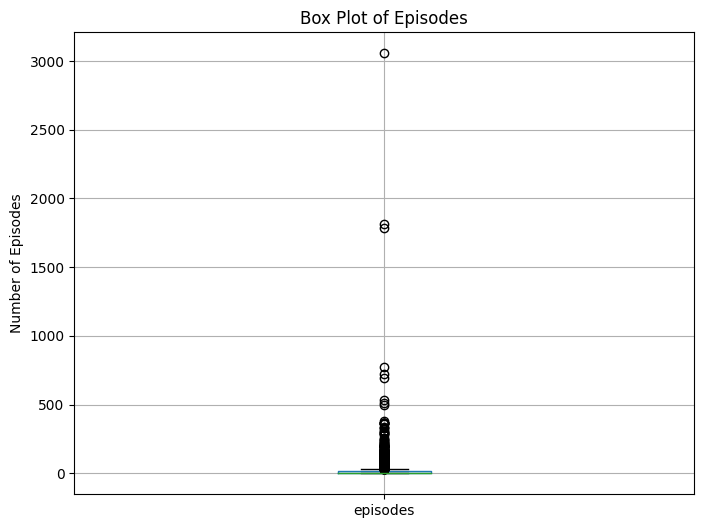

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df.boxplot(column='episodes')
plt.title('Box Plot of Episodes')
plt.ylabel('Number of Episodes')
plt.show()

In [31]:
df.drop(df[df['episodes'] < 1].index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10976 entries, 1 to 11476
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     10976 non-null  object
 1   genres    10976 non-null  object
 2   episodes  10976 non-null  int64 
 3   status    10976 non-null  object
 4   ranking   10976 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 514.5+ KB


In [32]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


# Split genres into lists
df['genres'] = df['genres'].str.split(', ')

# Convert genres into one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(df['genres']).transform(df['genres'])
genres_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply FP-Growth algorithm to find frequent itemsets
frequent_itemsets_fp = fpgrowth(genres_df, min_support=0.1, use_colnames=True)

# Print frequent itemsets
print("Frequent itemsets (FP-Growth):")
print(frequent_itemsets_fp)

# Find association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)

# Print association rules sorted by lift
print("\nAssociation rules sorted by lift (FP-Growth):")
print(rules_fp.sort_values(by='lift', ascending=False))


Frequent itemsets (FP-Growth):
     support              itemsets
0   0.384384              (Action)
1   0.357234             (Fantasy)
2   0.315324           (Adventure)
3   0.200437               (Drama)
4   0.251276              (Sci-Fi)
5   0.439960              (Comedy)
6   0.165087             (Romance)
7   0.119351        (Supernatural)
8   0.101676       (Slice of Life)
9   0.103772      (Comedy, Action)
10  0.145408     (Fantasy, Action)
11  0.122996     (Comedy, Fantasy)
12  0.172376  (Adventure, Fantasy)
13  0.142857   (Adventure, Action)
14  0.107234   (Comedy, Adventure)
15  0.141399      (Sci-Fi, Action)

Association rules sorted by lift (FP-Growth):
   antecedents  consequents  antecedent support  consequent support   support  \
2  (Adventure)    (Fantasy)            0.315324            0.357234  0.172376   
3    (Fantasy)  (Adventure)            0.357234            0.315324  0.172376   
6     (Sci-Fi)     (Action)            0.251276            0.384384  0.141399   
7  

In [33]:
from mlxtend.frequent_patterns import apriori, association_rules



# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(genres_df, min_support=0.15, use_colnames=True)

# Print frequent itemsets
print("Frequent itemsets:")
print(frequent_itemsets)

# Find association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Print association rules sorted by lift
print("\nAssociation rules sorted by lift:")
print(rules.sort_values(by='lift', ascending=False))


Frequent itemsets:
    support              itemsets
0  0.384384              (Action)
1  0.315324           (Adventure)
2  0.439960              (Comedy)
3  0.200437               (Drama)
4  0.357234             (Fantasy)
5  0.165087             (Romance)
6  0.251276              (Sci-Fi)
7  0.172376  (Adventure, Fantasy)

Association rules sorted by lift:
   antecedents  consequents  antecedent support  consequent support   support  \
0  (Adventure)    (Fantasy)            0.315324            0.357234  0.172376   
1    (Fantasy)  (Adventure)            0.357234            0.315324  0.172376   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.546663  1.530266  0.059732    1.417854       0.506106  
1    0.482530  1.530266  0.059732    1.323121       0.539105  


From the results of the frequent itemsets and association rules, we can make several inferences:

1. **Frequent Itemsets**:
   - The most common genres are Action, Comedy, and Fantasy, with support values of 0.384384, 0.439960, and 0.357234, respectively.
   - Adventure and Drama are also relatively common, with support values of 0.315324 and 0.200437, respectively.
   - Some genre combinations are frequent as well, such as (Action, Adventure), (Fantasy, Adventure), and (Comedy, Fantasy).

2. **Association Rules**:
   - The association rule with the highest lift is between Fantasy and Adventure. This suggests that these two genres often appear together in anime titles.
   - There are also strong association rules between Action and Sci-Fi, as well as between Adventure and Action. This indicates that these genres tend to co-occur frequently.
   - However, the confidence values for these rules are not exceptionally high, indicating that while there is a relationship between these genres, it's not a guarantee that if one genre is present, the other will be as well.

Overall, these results provide insights into the relationships between different genres in anime titles. They can be useful for content recommendation systems, genre-based marketing strategies, and understanding audience preferences.

In [34]:
df.head()

,title,genres,episodes,status,ranking
1,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy]",64,Finished Airing,2
2,Steins;Gate,"[Drama, Sci-Fi, Suspense]",24,Finished Airing,3
3,Gintama°,"[Action, Comedy, Sci-Fi]",51,Finished Airing,4
4,Shingeki no Kyojin Season 3 Part 2,"[Action, Drama]",10,Finished Airing,5
5,Gintama: The Final,"[Action, Comedy, Drama, Sci-Fi]",1,Finished Airing,6


In [35]:

# Add the ranking column to the one-hot encoded genres DataFrame
genres_df['ranking'] = df['ranking']

# Calculate the correlation matrix
correlation_matrix = genres_df.corr()

# Extract the correlation between genres and ranking
correlation_with_ranking = correlation_matrix['ranking'].drop('ranking')

# Rearrange the correlation with ranking in ascending order
correlation_with_ranking_sorted = correlation_with_ranking.sort_values()

print("Correlation between genres and ranking (sorted in ascending order):")
print(correlation_with_ranking_sorted)

Correlation between genres and ranking (sorted in ascending order):
Romance         -0.162811
Drama           -0.141022
Action          -0.132938
Mystery         -0.132457
Award Winning   -0.084328
Supernatural    -0.079113
Suspense        -0.060025
Ecchi           -0.030980
Girls Love      -0.029067
Horror          -0.027862
Hentai          -0.018740
Boys Love       -0.017365
Sci-Fi          -0.005382
Gourmet         -0.003008
Comedy           0.011926
Erotica          0.032431
Slice of Life    0.035099
Sports           0.037419
Adventure        0.052225
Fantasy          0.061230
Avant Garde      0.062094
Name: ranking, dtype: float64


### Inferences:

- **Positive Correlations**:
  - **Adventure (0.052225)** and **Fantasy (0.061230)** have strong positive correlations with the ranking. This indicates that anime titles with these genres tend to have higher rankings.
  - **Comedy (0.011926)** also shows a positive but weaker correlation.

- **Negative Correlations**:
  - **Drama (-0.141022)** and **Romance (-0.162811)** have negative correlations with the ranking, suggesting that anime titles with these genres tend to have lower rankings.
  - **Sci-Fi (-0.005382)** shows a weak negative correlation.

These correlations provide insights into how different genres are associated with the popularity or quality (as indicated by ranking) of the anime titles in your dataset.

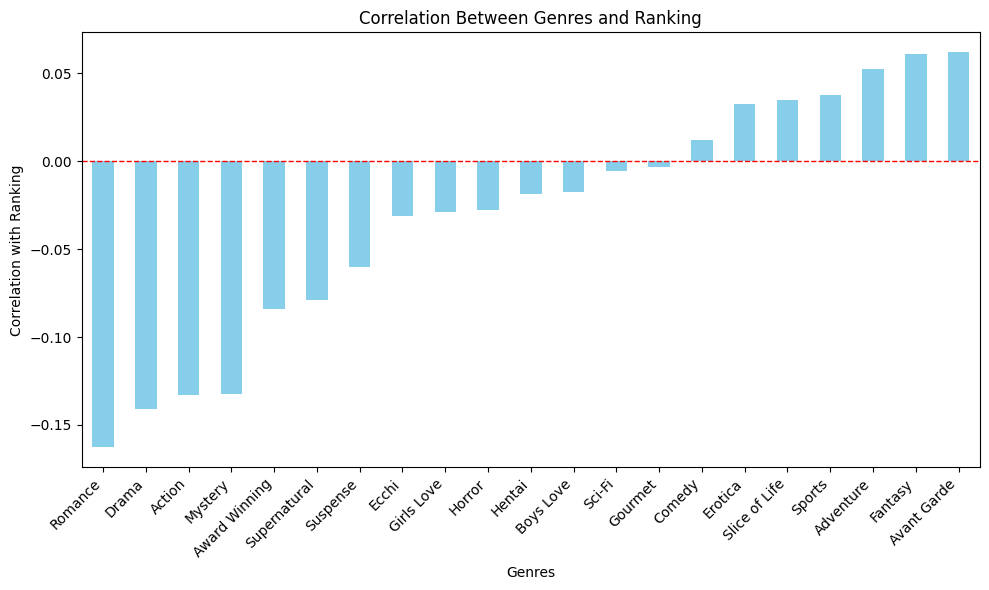

In [37]:
plt.figure(figsize=(10, 6))
correlation_with_ranking_sorted.plot(kind='bar', color='skyblue')
plt.title('Correlation Between Genres and Ranking')
plt.xlabel('Genres')
plt.ylabel('Correlation with Ranking')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.axhline(0, color='red', linestyle='--', linewidth=1)  

plt.show()
